In [1]:
import torch
import torch.nn.functional as F
import sys
try: # whether we're on titanic or not work on my regression_classif branch at least.
    sys.path.append("/home/mathieu/local/py_script/dnadna")
    import net as net_module
except ModuleNotFoundError:
    #sys.path.append("/home/jean/Documents/ML_genetics/dnadna/")
    #import net as net_module
    print("import fail")
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
dfparam = pd.read_csv('/media/mathieu/crucialmx300/exp/BacterialDemoSelection_param', sep="\t", header=0)
def compute_expected_class(scenario_name):
    expected_class = 1
    model_init = dfparam.at[int(scenario_name[24:29]),'model_init']
    demo=""
    if 'Bottleneck' in model_init :
        expected_class = 0
        demo = "Bot"
    if 'Constant' in model_init :
        expected_class = 1
        demo="Cst"
    if 'Expansion' in model_init :
        expected_class = 2
        demo="Exp"
    #selection = dfparam.at[int(scenario_name[24:29]),'selection']
    return expected_class, demo

In [3]:
# TP / (TP + FN)
# Proportion of the simulations with "bottleneck" predicted as such
def recall_bottle(grp):
    return sum((grp.expected == "Bot") & (grp.observed=="Bot")) / (sum(grp.expected == "Bot"))
def recall_cst(grp):
    return sum((grp.expected == "Cst") & (grp.observed=="Cst")) / (sum(grp.expected == "Cst"))
def recall_exp(grp):
    return sum((grp.expected == "Exp") & (grp.observed=="Exp")) / (sum(grp.expected == "Exp"))

In [4]:
# TP / (TP + FP)
# Proportion of the simulations predicted as "bottleneck" that are actually "bottleneck"
def precision_bottle(grp):
    return sum((grp.expected == "Bot") & (grp.observed=="Bot")) / (sum(grp.observed == "Bot"))
def precision_cst(grp):
    return sum((grp.expected == "Cst") & (grp.observed=="Cst")) / (sum(grp.observed == "Cst"))
def precision_expan(grp):
    return sum((grp.expected == "Exp") & (grp.observed=="Exp")) / (sum(grp.observed == "Exp"))

<h1>Original data</h1>

In [83]:
ori = pd.read_csv('/media/mathieu/crucialmx300/skyline/log/demolog/beastResultori.csv', sep=",", header=0)

In [84]:
ori['observed'] = "null"
ori['expected'] = "null"
for i in ori.index.values.tolist():
    name = ori.loc[i, 'scenario']
    ori.loc[i,"expected"]=compute_expected_class(name)[1]
    if ori.loc[i, 'variation'] == "constant":
        ori.loc[i, 'observed'] = "Cst"
    else :
        if float(ori.loc[i, 'sum(difpop)']) > 0:
            ori.loc[i, 'observed'] = "Bot" 
        else :
            ori.loc[i, 'observed'] = "Exp"

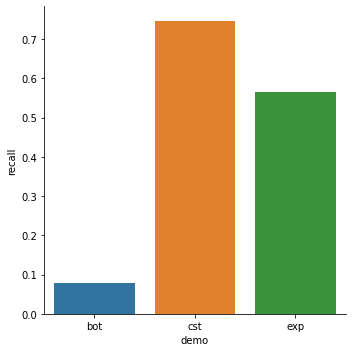

In [85]:
data = np.array([['bot',recall_bottle(ori)], ['cst',recall_cst(ori)], ['exp', recall_exp(ori)]])
dataset = pd.DataFrame({'demo': data[:, 0], 'recall': data[:, 1]})
sns.catplot(data=dataset, y="recall",x="demo", kind="bar", legend_out=True)

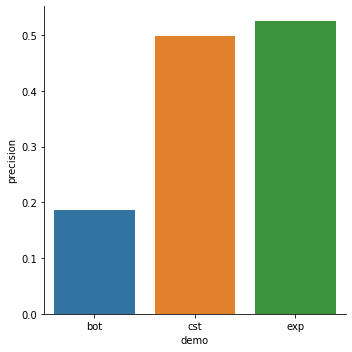

In [86]:
data = np.array([['bot',precision_bottle(ori)], ['cst',precision_cst(ori)], ['exp', precision_expan(ori)]])
dataset = pd.DataFrame({'demo': data[:, 0], 'precision': data[:, 1]})
sns.catplot(data=dataset, y="precision",x="demo", kind="bar", legend_out=True)

In [87]:
pd.crosstab(ori.observed, ori.expected)

expected  Bot  Cst  Exp
observed               
Bot        16   14   55
Cst       118  150   32
Exp        66   36  113

<h1>Damage Data med damage / c= 4</h1>

In [106]:
dom = pd.read_csv('/media/mathieu/crucialmx300/skyline/log/demolog/2beastmedResult.csv', sep=",", header=0)

In [107]:
dom['observed'] = "null"
dom['expected'] = "null"
for i in dom.index.values.tolist():
    name = dom.loc[i, 'scenario']
    dom.loc[i,"expected"]=compute_expected_class(name)[1]
    if dom.loc[i, 'variation'] == "constant":
        dom.loc[i, 'observed'] = "Cst"
    else :
        if dom.loc[i, 'sum(difpop)'] > 0:
            dom.loc[i, 'observed'] = "Bot" 
        else :
            dom.loc[i, 'observed'] = "Exp"

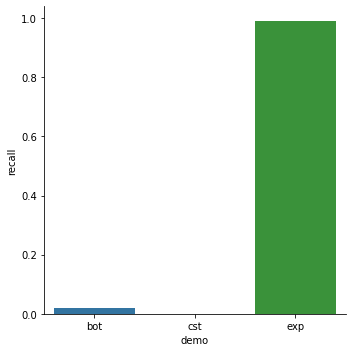

In [108]:
data = np.array([['bot',recall_bottle(dom)], ['cst',recall_cst(dom)], ['exp', recall_exp(dom)]])
dataset = pd.DataFrame({'demo': data[:, 0], 'recall': data[:, 1]})
sns.catplot(data=dataset, y="recall",x="demo", kind="bar", legend_out=True)

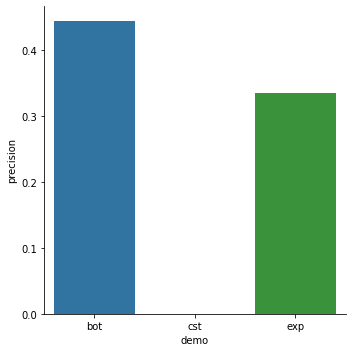

In [110]:
data = np.array([['bot',precision_bottle(dom)], ['cst',precision_cst(dom)], ['exp', precision_expan(dom)]])
dataset = pd.DataFrame({'demo': data[:, 0], 'precision': data[:, 1]})
sns.catplot(data=dataset, y="precision",x="demo", kind="bar", legend_out=True)

In [111]:
pd.crosstab(dom.observed, dom.expected)

expected  Bot  Cst  Exp
observed               
Bot         4    2    2
Exp       194  198  198

<h1>no damage (mapdamage) / c = 8</h1>

In [112]:
dom = pd.read_csv('/media/mathieu/crucialmx300/skyline/log/demolog/beast8Result.csv', sep=",", header=0)

In [113]:
dom['observed'] = "null"
dom['expected'] = "null"
for i in dom.index.values.tolist():
    name = dom.loc[i, 'scenario']
    dom.loc[i,"expected"]=compute_expected_class(name)[1]
    if dom.loc[i, 'variation'] == "constant":
        dom.loc[i, 'observed'] = "Cst"
    else :
        if dom.loc[i, 'sum(difpop)'] > 0:
            dom.loc[i, 'observed'] = "Bot" 
        else :
            dom.loc[i, 'observed'] = "Exp"

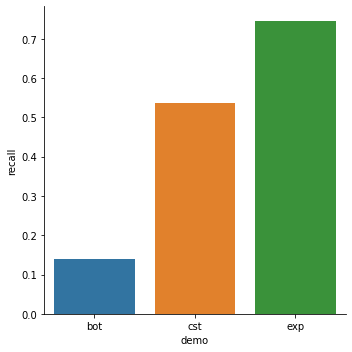

In [114]:
data = np.array([['bot',recall_bottle(dom)], ['cst',recall_cst(dom)], ['exp', recall_exp(dom)]])
dataset = pd.DataFrame({'demo': data[:, 0], 'recall': data[:, 1]})
sns.catplot(data=dataset, y="recall",x="demo", kind="bar", legend_out=True)

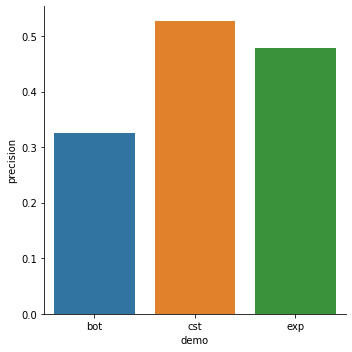

In [115]:
data = np.array([['bot',precision_bottle(dom)], ['cst',precision_cst(dom)], ['exp', precision_expan(dom)]])
dataset = pd.DataFrame({'demo': data[:, 0], 'precision': data[:, 1]})
sns.catplot(data=dataset, y="precision",x="demo", kind="bar", legend_out=True)

In [116]:
pd.crosstab(dom.observed, dom.expected)

expected  Bot  Cst  Exp
observed               
Bot        28   20   37
Cst        82  108   14
Exp        90   72  149